In [2]:
import numpy as np
import pandas as pd
from warnings import warn

import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("q011.xlsx")

In [4]:
data.head()

,Код склада,Название склада,Дата,Код гр.,Название гр.,Код товара,1 наименование,2 наименование,кол-во,Сумма в пр.ценах,Сумма в ср. зак,Сумма в баз. Ценах,Стоимость одной штуки
0,X34,Б Колпино хоз,2018-10-27,Q01,Бытовая химия,23917057,Ароматизатор возд. LаCasadelosAromas Са,Ароматизатор возд. LаCasadelosAromas Сашет Ва...,2,490.0,318.0,490.0,245.0
1,X34,Б Колпино хоз,2019-09-15,Q01,Бытовая химия,23917057,Ароматизатор возд. LаCasadelosAromas Са,Ароматизатор возд. LаCasadelosAromas Сашет Ва...,1,245.0,159.0,245.0,245.0
2,q,Б Гатчина хоз,2018-12-04,Q01,Бытовая химия,23917057,Ароматизатор возд. LаCasadelosAromas Са,Ароматизатор возд. LаCasadelosAromas Сашет Ва...,2,490.0,318.0,490.0,245.0
3,q,Б Гатчина хоз,2018-05-25,Q01,Бытовая химия,23917057,Ароматизатор возд. LаCasadelosAromas Са,Ароматизатор возд. LаCasadelosAromas Сашет Ва...,1,238.0,159.0,245.0,245.0
4,q,Б Гатчина хоз,2018-05-30,Q01,Бытовая химия,23917057,Ароматизатор возд. LаCasadelosAromas Са,Ароматизатор возд. LаCasadelosAromas Сашет Ва...,1,233.0,159.0,245.0,245.0


In [5]:
print('Кол-во уникальных товаров: ', data['Код товара'].unique().shape)
print('Объем данных: ', data.shape)

Кол-во уникальных товаров:  (1886,)
Объем данных:  (853384, 13)


In [6]:
codes = data['Код товара'].unique()

In [7]:
data_code_test = data.loc[data['Код товара'] == codes[40]][['Дата', '1 наименование', 'кол-во', 'Стоимость одной штуки']]
data_code_test

,Дата,1 наименование,кол-во,Стоимость одной штуки
5769,2017-12-09,Бальзам Репейный с компл. протеинов для,1,69.0
5770,2018-02-24,Бальзам Репейный с компл. протеинов для,1,69.0
5771,2018-07-07,Бальзам Репейный с компл. протеинов для,1,69.0
5772,2018-07-26,Бальзам Репейный с компл. протеинов для,1,69.0
5773,2018-08-17,Бальзам Репейный с компл. протеинов для,1,69.0
...,...,...,...,...
6654,2019-04-30,Бальзам Репейный с компл. протеинов для,1,79.0
6655,2019-02-08,Бальзам Репейный с компл. протеинов для,1,79.0
6656,2019-09-21,Бальзам Репейный с компл. протеинов для,1,79.0
6657,2019-11-15,Бальзам Репейный с компл. протеинов для,1,79.0


In [8]:
from fbprophet import Prophet
from datetime import datetime
import time

In [9]:
dates=data_code_test[['Дата']].values

In [10]:
dates=data_code_test[['Дата']].values.reshape(1,-1)[0]
print(dates)

['2017-12-09T00:00:00.000000000' '2018-02-24T00:00:00.000000000'
 '2018-07-07T00:00:00.000000000' '2018-07-26T00:00:00.000000000'
 '2018-08-17T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-08-29T00:00:00.000000000' '2018-12-31T00:00:00.000000000'
 '2019-02-05T00:00:00.000000000' '2019-05-18T00:00:00.000000000'
 '2019-07-09T00:00:00.000000000' '2019-12-09T00:00:00.000000000'
 '2018-06-16T00:00:00.000000000' '2018-06-24T00:00:00.000000000'
 '2018-05-07T00:00:00.000000000' '2018-07-08T00:00:00.000000000'
 '2019-04-02T00:00:00.000000000' '2019-02-27T00:00:00.000000000'
 '2019-03-31T00:00:00.000000000' '2019-06-20T00:00:00.000000000'
 '2019-06-30T00:00:00.000000000' '2019-07-20T00:00:00.000000000'
 '2019-07-27T00:00:00.000000000' '2019-06-10T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-04-19T00:00:00.000000000'
 '2020-08-05T00:00:00.000000000' '2017-12-07T00:00:00.000000000'
 '2017-08-16T00:00:00.000000000' '2017-08-28T00:00:00.000000000'
 '2017-08-31T00:00:00.000

In [11]:
ds = pd.to_datetime(dates)

In [12]:
ds.shape

(890,)

In [13]:
ds

DatetimeIndex(['2017-12-09', '2018-02-24', '2018-07-07', '2018-07-26',
               '2018-08-17', '2018-08-20', '2018-08-29', '2018-12-31',
               '2019-02-05', '2019-05-18',
               ...
               '2018-11-30', '2018-08-12', '2018-12-22', '2018-12-31',
               '2019-03-01', '2019-04-30', '2019-02-08', '2019-09-21',
               '2019-11-15', '2019-12-28'],
              dtype='datetime64[ns]', length=890, freq=None)

In [14]:
y=data_code_test[['кол-во']].values.reshape(1,-1)[0]
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 2 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 1 1 1 

In [15]:
y.shape

(890,)

In [16]:
forecast_prophet = pd.DataFrame({'ds': ds, 'y': y})

In [17]:
forecast_prophet.tail()

,ds,y
885,2019-04-30,1
886,2019-02-08,1
887,2019-09-21,1
888,2019-11-15,1
889,2019-12-28,1


In [18]:
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='RU')
model.fit(forecast_prophet)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [19]:
model.train_holiday_names

0                    New Year's Day
1            Orthodox Christmas Day
2                     Christmas Day
3    Defender of the Fatherland Day
4         International Women's Day
5                 National Flag Day
6             Spring and Labour Day
7                       Victory Day
8                        Russia Day
9                         Unity Day
dtype: object

In [20]:
future = model.make_future_dataframe(periods=24, freq='W')
future.head()

,ds
0,2017-01-09
1,2017-01-10
2,2017-01-11
3,2017-01-11
4,2017-01-12


In [21]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
909,2021-03-21,1.128792,0.749074,1.521535
910,2021-03-28,1.208962,0.840466,1.573472
911,2021-04-04,1.292311,0.924329,1.710238
912,2021-04-11,1.310236,0.931855,1.695896
913,2021-04-18,1.249708,0.858627,1.624615


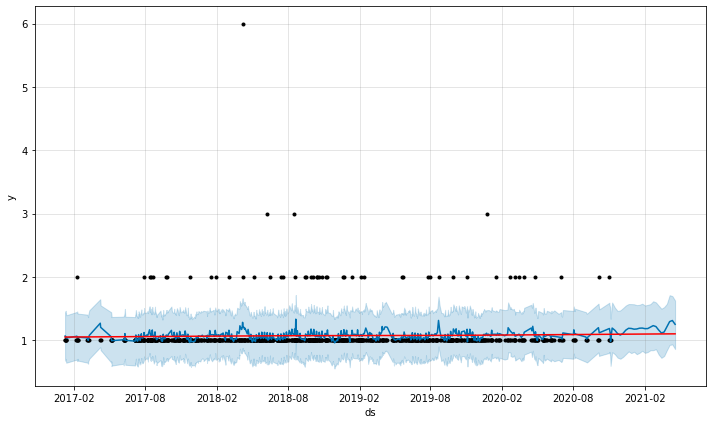

In [23]:
from fbprophet.plot import add_changepoints_to_plot
fig3 = model.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), model, forecast)


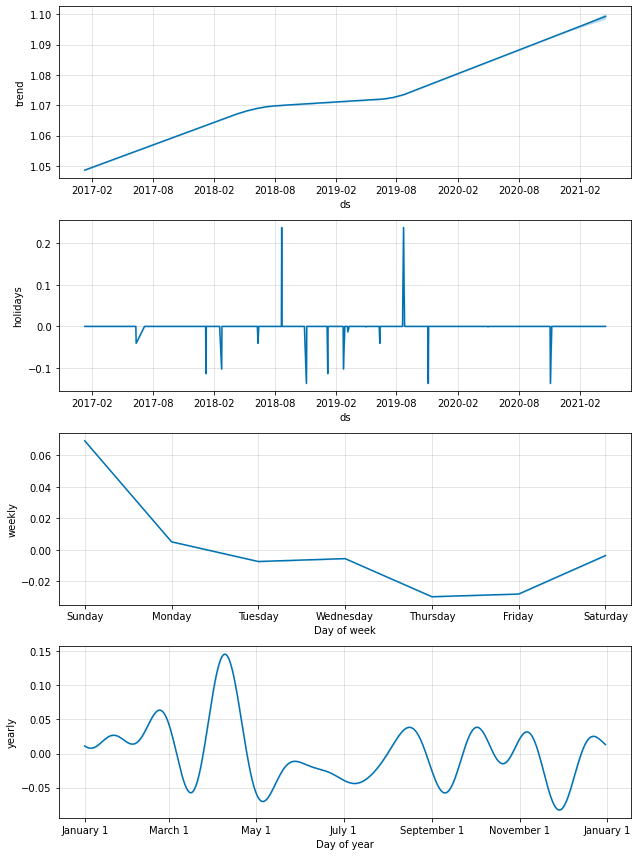

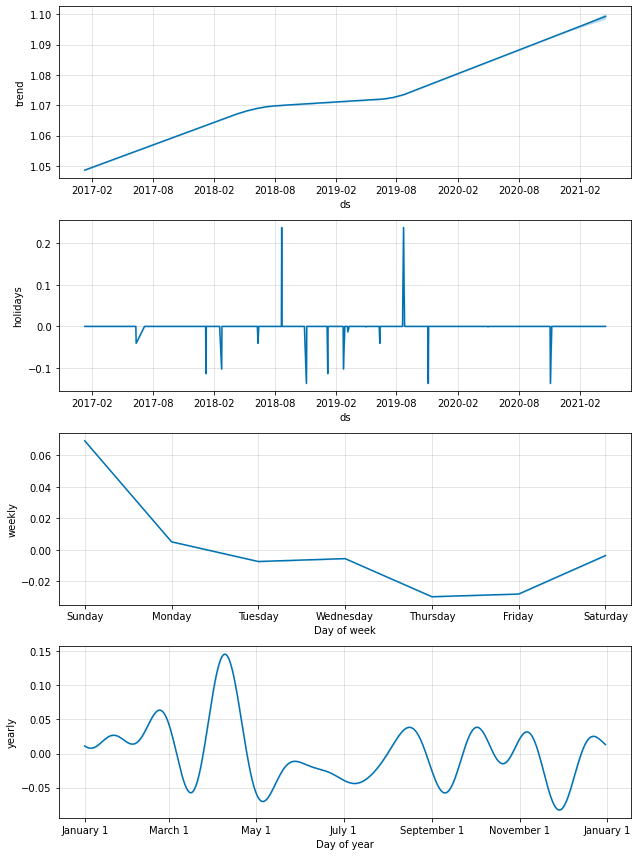

In [24]:
model.plot_components(forecast)